# Wine Color

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib.ticker import PercentFormatter
import numpy as np
from sklearn.mixture import GaussianMixture

sns.set_style("whitegrid")

In [2]:
wine_data = pd.read_csv("./data/wineData.csv")
wine_data.Color = pd.Categorical(wine_data.Color)
wine_data.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Color
0,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.9903,3.37,0.42,12.9,92,White
1,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.9970,3.20,0.46,10.4,89,White
2,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.9898,3.28,0.36,12.7,88,White
3,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.9906,3.28,0.48,12.5,86,White
4,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,85,Red


In [3]:
numeric_data = wine_data.iloc[:, :-1]

The DataFrame wine_data contains several features which describe the chemical composition for many different wines. The numeric data is also stored in the array numeric_data. 

In [4]:
pca = PCA(n_components=numeric_data.shape[1])
Y = pca.fit_transform(numeric_data)
variance_ratio = pca.explained_variance_ratio_

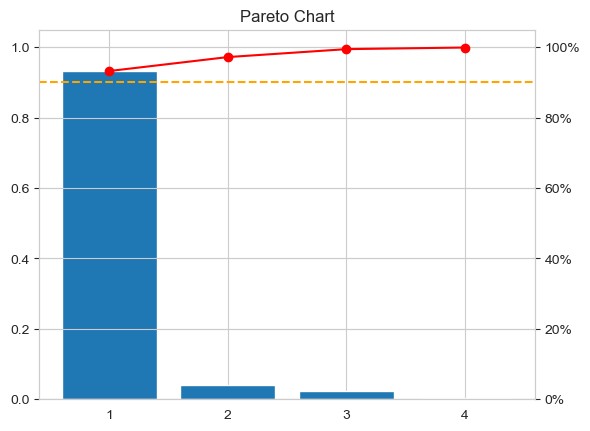

In [5]:
# Set figure and axis
fig, ax = plt.subplots()

# Plot bars (i.e. frequencies)
ax.bar(np.arange(1, 5), variance_ratio[:4])
ax.set_ylim(0, variance_ratio.sum()*1.05)
ax.set_title("Pareto Chart")
ax.set_xticks(np.arange(1, 5))

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(np.arange(1, 5), (variance_ratio[:4] / variance_ratio.sum() * 100).cumsum(), color="red", marker="o")
ax2.axhline(90, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim(0, 100*1.05)

plt.show()

In [6]:
model = GaussianMixture(n_components=2)
labels = model.fit_predict(numeric_data)

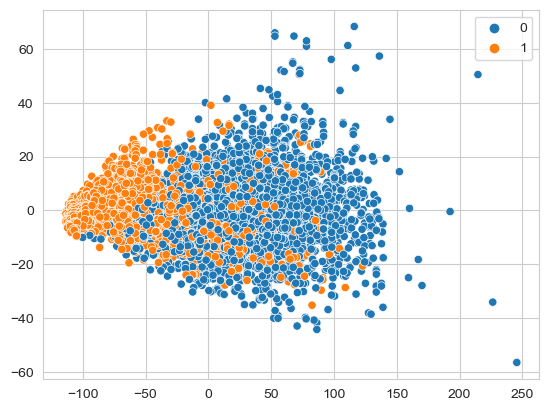

In [7]:
plt.figure()
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=labels)
plt.show()

In [8]:
counts = pd.crosstab(wine_data.Color, labels)
counts.columns.name = ''
counts.index.name = ''
counts

,0,1
,,
Red,14,1546
White,4559,329


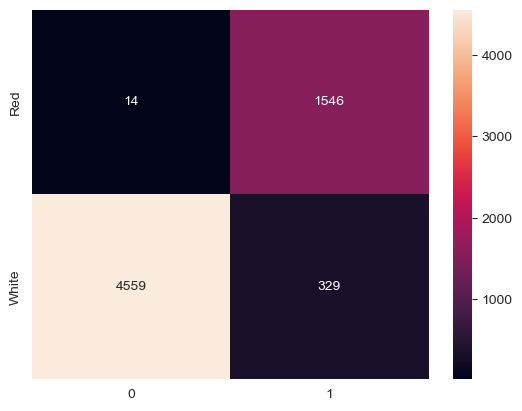

In [9]:
plt.figure()
sns.heatmap(counts, annot=True, fmt="")
plt.show()